# Experiment 1

### Include the common code notebook

In [1]:
%run CommonCodeForExperiments.ipynb

In [2]:
aitia = App()

In [3]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [10]:
def run_causal_discovery(df, target_graph_str, algorithm_list, pc):
    analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=algorithm_list,
                                               pc=pc)  
    return analysis_results, summary 

In [4]:
def get_clustered_dataframe(incoming_df, column_list,  n_clusters, sample_size):
    gmm = mixture.BayesianGaussianMixture(n_components=n_clusters).fit(incoming_df)
    clustered_data = gmm.sample(sample_size)
    clustered_df = pd.DataFrame(clustered_data[0], columns=column_list)
    return clustered_df

In [5]:
pc = pycausal()
pc.start_vm()

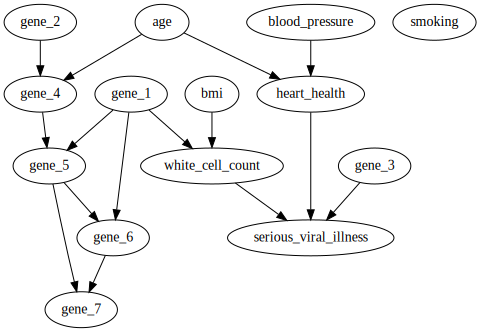

In [6]:
virus_scm = aitia.data.virus_scm()
virus_scm.cgm.draw()

In [7]:
target_graph_str = str(virus_scm.cgm.draw())

In [8]:
df = virus_scm.sample(2000)
df

,smoking,blood_pressure,gene_3,gene_2,gene_1,bmi,white_cell_count,age,heart_health,serious_viral_illness,gene_4,gene_5,gene_6,gene_7
0,1.345997,-0.615309,1.429348,-0.031160,0.169959,-0.233793,-0.493837,-1.673644,-4.173745,-3.352174,0.380917,2.392638,2.567188,0.189679
1,0.064749,-0.678545,-0.708049,0.740018,0.984347,-1.105504,-2.836696,2.055943,0.483228,0.450908,-1.788719,0.785755,0.613574,-1.995918
2,-1.633171,-0.565777,-1.707580,0.107110,-0.860806,-1.044378,0.371807,-0.574488,-2.447587,0.510340,-1.264959,-1.817132,-3.382603,1.049487
3,0.649054,0.144485,-1.169126,-0.375495,-0.002681,-0.708965,-1.187215,-0.817930,-0.826721,-0.907748,1.195822,2.006960,2.890963,-1.326490
4,0.299870,1.848100,1.013300,0.038950,1.266369,-0.760200,-2.347095,0.597449,2.144148,-3.147565,-1.135585,-0.079913,1.149322,-2.846486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.499380,-0.174514,0.762373,1.262044,0.861278,1.515949,-0.673895,0.188227,-0.965007,-2.329245,-0.908600,0.551301,1.710159,-0.967692
1996,0.006413,-0.505843,0.657731,0.473759,-0.608297,0.650821,0.925137,0.803081,1.675444,-1.078732,-1.612846,-1.711605,-1.821709,1.419458
1997,-0.259473,0.206906,-1.053846,-0.107203,0.229847,2.936646,1.188335,0.085855,2.797123,1.980469,-1.858125,-2.218844,-3.976130,0.443291
1998,0.751972,0.086044,1.531950,0.647092,-0.070055,-0.784043,-1.495383,1.246767,1.186863,-3.914738,-1.999347,-2.422401,-3.020256,1.703575


In [11]:
analysis_results, summary = run_causal_discovery(df, target_graph_str, algorithm_list, pc)
summary

,Algorithm,AUPR,SHD
0,PC,0.935884,2
1,FCI,0.935884,2
2,FGES-continuous,0.935884,2
3,GFCI-continuous,0.935884,2
4,RFCI-continuous,0.935884,2


In [14]:
df_confd = df.drop(['white_cell_count', 'heart_health'], axis=1)

In [13]:
analysis_results_confd, summary_confd = run_causal_discovery(df_confd, target_graph_str, algorithm_list, pc)
summary_confd

,Algorithm,AUPR,SHD
0,PC,0.690306,9
1,FCI,0.690306,9
2,FGES-continuous,0.661460,10
3,GFCI-continuous,0.661460,10
4,RFCI-continuous,0.690306,9


In [15]:
min_clusters = 2
max_clusters = 7

In [17]:
n_clusters = np.arange(min_clusters, max_clusters)
iterations = max_clusters
column_list = list(df_confd)
for n in n_clusters:
    clustered_df = get_clustered_dataframe(df_confd, column_list, 2, 2000)
    _, summary_confd = run_causal_discovery(clustered_df, target_graph_str, algorithm_list, pc)
    print(summary_confd.mean(axis=0))

AUPR     0.66146
SHD     10.00000
dtype: float64
AUPR    0.668878
SHD     9.800000
dtype: float64
AUPR    0.678768
SHD     9.400000
dtype: float64
AUPR     0.642998
SHD     10.800000
dtype: float64
AUPR    0.678768
SHD     9.400000
dtype: float64


In [80]:
bics, bics_err = get_bic_scores(min_clusters, max_clusters, df2)

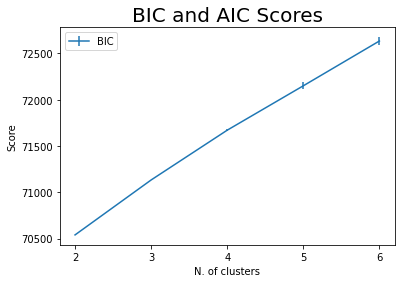

In [81]:
plot_bic_aic_scores(bics, bics_err, min_clusters, max_clusters)

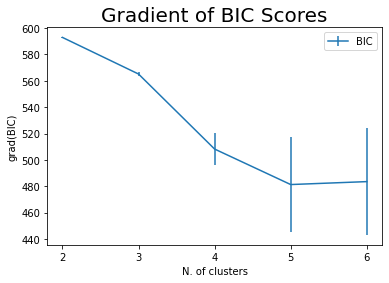

In [82]:
plot_bic_gradient(bics, bics_err, min_clusters, max_clusters)

In [83]:
tt_results, tt_res_sigs = get_train_test_distance(min_clusters, max_clusters, df2)

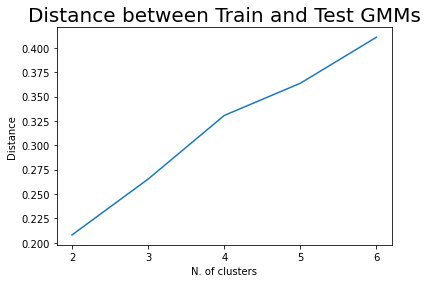

In [84]:
plot_train_test_distance(tt_results, tt_res_sigs, min_clusters, max_clusters)

In [85]:
sils, sils_err = get_silhouette_coefficient(min_clusters, max_clusters, df)

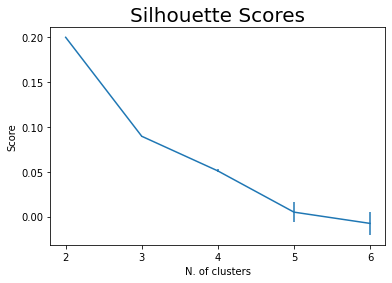

In [86]:
plot_silhouette_coefficient(sils, sils_err, min_clusters, max_clusters)

In [113]:
column_list = list(df2)
clustered_df = get_clustered_dataframe(df2, column_list, 2, 2000)

In [114]:
clustered_df

,smoking,blood_pressure,gene_3,gene_2,gene_1,bmi,age,serious_viral_illness,gene_4,gene_5,gene_6,gene_7
0,-0.893796,-0.573437,-2.207184,-0.344966,0.302944,-1.087053,0.656235,1.321112,-1.057376,-0.963232,-2.415388,0.363736
1,1.628964,-2.221658,-0.357635,-0.445873,0.645223,-0.649863,-1.677620,-3.146163,0.968273,1.329548,2.082275,0.049611
2,0.127227,0.036242,0.471470,0.247902,-0.558809,-1.258508,0.884981,-0.782272,-1.703845,-0.898981,-0.741481,0.606134
3,1.081085,2.433850,0.752081,0.100759,-1.833376,0.344762,1.367275,0.505519,0.155286,-1.898017,-2.777936,1.767560
4,-1.224027,1.662453,1.604708,0.166306,-0.250537,-0.224392,-0.626996,-0.515094,1.446884,0.572088,0.428187,0.691800
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.000103,-0.160020,0.496153,0.049052,0.560628,-0.717246,-0.011540,-0.022303,-0.332531,1.431596,1.590142,0.402458
1996,-0.054882,-0.854813,-0.674557,-0.397722,0.250389,-1.153798,0.789557,-1.289553,-0.530205,-0.366434,0.883564,-1.892646
1997,1.345841,-1.203810,0.465437,-0.251739,-0.318034,-0.712793,-0.749213,-1.928320,1.241811,-1.336729,0.142552,-0.475338
1998,0.258805,-0.347515,-0.252372,-0.209652,-0.766958,1.518216,0.008314,1.286668,-0.365767,-1.582929,-1.259038,-0.053128


In [115]:
analysis_results_clustered, summary_clustered = aitia.run_analysis(clustered_df, 
                                                target_graph_str=target_graph_str, 
                                                algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                ],
                                                pc=pc)
summary_clustered

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.724397,8
1,FCI,False,0.724397,8
2,FGES-continuous,False,0.690306,9
3,GFCI-continuous,False,0.690306,9
4,RFCI-continuous,False,0.724397,8


In [90]:
gmm = mixture.BayesianGaussianMixture(n_components=3).fit(df2)
clustered_data2 = gmm.sample(2000)
clustered_df2 = pd.DataFrame(clustered_data2[0], columns=list(df2))
analysis_results_clustered2, summary_clustered2 = aitia.run_analysis(clustered_df2, 
                                                target_graph_str=target_graph_str, 
                                                algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                ],
                                                pc=pc)
summary_clustered2

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.661460,10
1,FCI,False,0.661460,10
2,FGES-continuous,False,0.615306,12
3,GFCI-continuous,False,0.615306,12
4,RFCI-continuous,False,0.661460,10


In [91]:
gmm = mixture.BayesianGaussianMixture(n_components=4).fit(df2)
clustered_data3 = gmm.sample(2000)
clustered_df3 = pd.DataFrame(clustered_data3[0], columns=list(df2))
analysis_results_clustered3, summary_clustered3 = aitia.run_analysis(clustered_df3, 
                                                  target_graph_str=target_graph_str, 
                                                  algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                  ],
                                                  pc=pc)
summary_clustered3

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.690306,9
1,FCI,False,0.690306,9
2,FGES-continuous,False,0.636735,11
3,GFCI-continuous,False,0.690306,9
4,RFCI-continuous,False,0.690306,9


In [92]:
summary.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.922619
SHD                      2.400000
dtype: float64

In [93]:
summary_clustered.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.673823
SHD                      9.600000
dtype: float64

In [94]:
summary_clustered2.mean(axis=0)

Isomorphic to Target?     0.000000
AURC                      0.642998
SHD                      10.800000
dtype: float64

In [95]:
summary_clustered3.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.679592
SHD                      9.400000
dtype: float64